# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [17]:
df = pd.read_csv("../data/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.


In [32]:
#Seu código aqui para a média
media = df.groupby('Categoria')['Preco_Normal'].agg(['mean']).reset_index()
print(media)

                    Categoria         mean
0  belleza-y-cuidado-personal  1783.556485
1          comidas-preparadas  3095.043478
2                  congelados  2108.042553
3                      frutas  1724.473684
4        instantaneos-y-sopas   765.491228
5                     lacteos  2385.219239
6                    verduras  1343.296875


In [33]:
#Seu código aqui para a mediana
mediana = df.groupby('Categoria')['Preco_Normal'].agg(['median']).reset_index()
print(mediana)

                    Categoria  median
0  belleza-y-cuidado-personal  1569.0
1          comidas-preparadas  3290.0
2                  congelados  1519.0
3                      frutas  1195.0
4        instantaneos-y-sopas   439.0
5                     lacteos   989.0
6                    verduras  1180.0


In [35]:
media_mediana = pd.merge(media, mediana, on='Categoria')
media_mediana['media_menor_mediana'] = media_mediana['mean'] < media_mediana['median']
print('Categorias com MEDIA < MEDIANA:')
print(media_mediana[media_mediana['media_menor_mediana']]['Categoria'].tolist())
print('\nCategorias com MEDIA > MEDIANA:')
print(media_mediana[~media_mediana['media_menor_mediana']]['Categoria'].tolist())

Categorias com MEDIA < MEDIANA:
['comidas-preparadas']

Categorias com MEDIA > MEDIANA:
['belleza-y-cuidado-personal', 'congelados', 'frutas', 'instantaneos-y-sopas', 'lacteos', 'verduras']


Digite aqui as categorias:

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [38]:
#Seu código aqui
desvio = df.groupby('Categoria')['Preco_Normal'].std().reset_index()
desvio.rename(columns={'Preco_Normal': 'DesvioPadrao'}, inplace=True)
media_mediana_desvio = pd.merge(media_mediana, desvio, on='Categoria')

ordenar_categoria_maior_desvio = media_mediana_desvio.sort_values(by='DesvioPadrao')

print(ordenar_categoria_maior_desvio.head(10))

                    Categoria         mean  median  media_menor_mediana  \
6                    verduras  1343.296875  1180.0                False   
4        instantaneos-y-sopas   765.491228   439.0                False   
3                      frutas  1724.473684  1195.0                False   
1          comidas-preparadas  3095.043478  3290.0                 True   
2                  congelados  2108.042553  1519.0                False   
0  belleza-y-cuidado-personal  1783.556485  1569.0                False   
5                     lacteos  2385.219239   989.0                False   

   DesvioPadrao  
6   1012.699625  
4   1170.232869  
3   1639.151114  
1   2019.911428  
2   2111.539896  
0   2210.041719  
5   3925.816164  


Digite nesse campo o comportamento que você identificou.

Nas categorias com maior desvio padrão, observamos que a média dos preços geralmente é maior que a mediana, indicando uma possível assimetria positiva na distribuição dos preços. Isso sugere que existem valores mais altos que puxam a média para cima, causando uma dispersão maior nos preços dentro dessas categorias. Em algumas categorias, quando a média é menor que a mediana, pode indicar uma assimetria negativa, com alguns preços mais baixos influenciando o comportamento geral. Portanto, o desvio padrão elevado está associado a distribuições de preços mais heterogêneas, com maior variação e possível presença de outliers.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

Categoria com maior desvio padrao: verduras


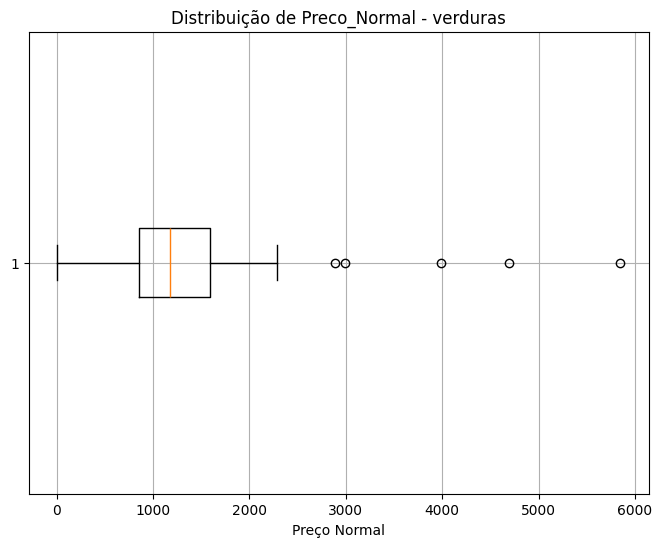

In [40]:
#Seu código aqui
categoria_maior_desvio = ordenar_categoria_maior_desvio.iloc[0]['Categoria']
print(f'Categoria com maior desvio padrao: {categoria_maior_desvio}')

df_categoria = df.loc[df['Categoria'] == categoria_maior_desvio]

plt.figure(figsize=(8, 6))
plt.boxplot(df_categoria['Preco_Normal'], vert=False)
plt.title(f'Distribuição de Preco_Normal - {categoria_maior_desvio}')
plt.xlabel('Preço Normal')
plt.grid(True)
plt.show()

O boxplot da categoria "verduras" mostra que a maioria dos preços está concentrada abaixo de 2000, mas há diversos outliers acima desse valor, chegando a quase 6000. Esses outliers indicam uma dispersão significativa dos preços e explicam o alto desvio padrão da categoria. A distribuição é assimétrica positivamente, com a média sendo maior que a mediana.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

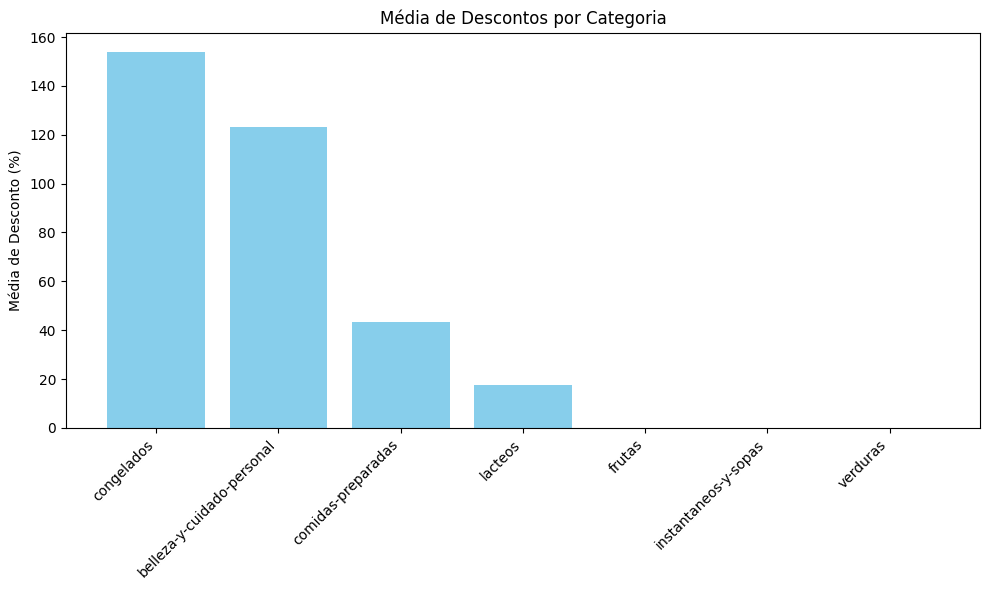

In [41]:
# Seu código aqui
media_desconto = df.groupby('Categoria')['Desconto'].mean().reset_index()

media_desconto = media_desconto.sort_values(by='Desconto', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(media_desconto['Categoria'], media_desconto['Desconto'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Média de Desconto (%)')
plt.title('Média de Descontos por Categoria')
plt.tight_layout()
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [45]:
# Seu código aqui

desconto_medio = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# Criar uma Treemap interativo

fig = px.treemap(
    desconto_medio,
    path=['Categoria', 'Marca'],
    values='Desconto',
    color='Desconto',
    color_continuous_scale='Blues',
    title='Treemap - Média de Desconto por Categoria e Marca'
)
fig.show()